<a href="https://colab.research.google.com/github/alexandre-braga/DCC190/blob/main/DCC_190_Lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 1


Problema de Valor Inicial
 \begin{eqnarray}
 \dfrac{d u}{d t}+ au=0,  \ \ \ \ u(0)=b.
\end{eqnarray}


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Solução Exata
$$
u(t_n)=b\exp(-at_n)
$$

In [2]:
def Exata(a,b,t):
  return b*np.exp(-a*t)

Theta Variável
$$
\dfrac{u^{n+1} - u^n}{\Delta t} + {a} [(1-θ)u^{n} + θ u^{n+1}] = 0
$$
Implementação
$$
u^{n+1} = u^n \left(\dfrac{1 - aΔtθ}{1 + aΔt(1-θ)}\right)
$$

In [3]:
def thetaVariavel(nel,a,b,dt,theta):
  u = np.zeros(nel+1)
  u[0] = b
  for n in range(0,nel):
    u[n+1] = u[n]*( (1-a*dt*theta) / (1 + a*dt*(1-theta)) )

  return u

In [4]:
def rungeKutta(nel,a,b,dt):
  u = np.zeros(nel+1)
  u[0] = b
  for n in range(0,nel):
    u[n+1] = u[n]*( 1 - a*dt + (a*a*dt*dt)/2 )
  return u

In [5]:
def diferencaCentral(nel,a,b,dt):
  u = np.zeros(nel+1)
  u[0] = b
  u[1] = b*(1 - a*dt)
  for n in range(1,nel):
    u[n+1] = -2*a*dt*u[n] + u[n-1]

  return u

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


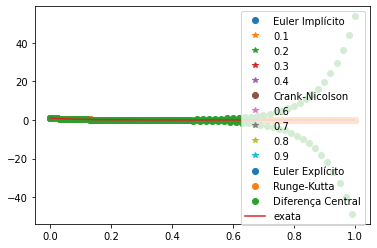

In [6]:
ti = 0
tf = 1
a = 10
b = 1
nel = 100
dt = (tf-ti)/nel

t = np.linspace(ti,tf,nel+1)
tt = np.linspace(ti,tf,100)
variaveltheta = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])


for i in range (len(variaveltheta)):
  print(variaveltheta[i])
  if variaveltheta[i] == 0:
    plt.plot(t, thetaVariavel(nel,a,b,dt,variaveltheta[i]), 'o') 
    continue
  if variaveltheta[i] == 0.5:
    plt.plot(t, thetaVariavel(nel,a,b,dt,variaveltheta[i]), 'o') 
    continue
  if variaveltheta[i] == 1.0:
    plt.plot(t, thetaVariavel(nel,a,b,dt,variaveltheta[i]), 'o') 
    continue
  plt.plot(t, thetaVariavel(nel,a,b,dt,variaveltheta[i]), '*')

plt.plot(t, rungeKutta(nel,a,b,dt), 'o') 
plt.plot(t, diferencaCentral(nel,a,b,dt), 'o') 

plt.plot(tt,Exata(a,b,tt))
plt.legend(["Euler Implícito", "0.1", "0.2", "0.3", "0.4", "Crank-Nicolson", "0.6", "0.7", "0.8", "0.9", "Euler Explícito", "Runge-Kutta", "Diferença Central","exata"])
plt.show()  

Erro na norma do máximo (norma do infinito)
$$
\|u(t_n)-u^n\|_{\infty} = \max_{0\leq n \leq N}{|u(t_n)-u^n|}
$$

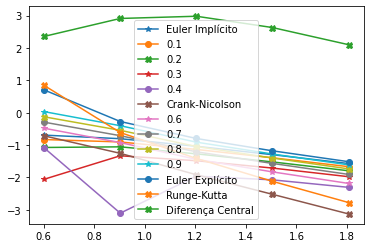

In [7]:
k = 5
erro_EI = np.zeros(k)
erro_1 = np.zeros(k)
erro_2 = np.zeros(k)
erro_3 = np.zeros(k)
erro_4 = np.zeros(k)
erro_CK = np.zeros(k)
erro_6 = np.zeros(k)
erro_7 = np.zeros(k)
erro_8 = np.zeros(k)
erro_9 = np.zeros(k)
erro_EE = np.zeros(k)
erro_RG = np.zeros(k)
erro_DC = np.zeros(k)

refin = np.zeros(k)

for i in range(0,k):
  nel = 2**(i+2)
  dt = (tf-ti)/nel
  t = np.linspace(ti,tf,nel+1)
  erro_EI[i] = np.max(np.abs(thetaVariavel(nel,a,b,dt,0.0) - Exata(a,b,t)))
  erro_1[i] = np.max(np.abs(thetaVariavel(nel,a,b,dt,0.1) - Exata(a,b,t)))
  erro_2[i] = np.max(np.abs(thetaVariavel(nel,a,b,dt,0.2) - Exata(a,b,t)))
  erro_3[i] = np.max(np.abs(thetaVariavel(nel,a,b,dt,0.3) - Exata(a,b,t)))
  erro_4[i] = np.max(np.abs(thetaVariavel(nel,a,b,dt,0.4) - Exata(a,b,t)))
  erro_CK[i] = np.max(np.abs(thetaVariavel(nel,a,b,dt,0.5) - Exata(a,b,t)))
  erro_6[i] = np.max(np.abs(thetaVariavel(nel,a,b,dt,0.6) - Exata(a,b,t)))
  erro_7[i] = np.max(np.abs(thetaVariavel(nel,a,b,dt,0.7) - Exata(a,b,t)))
  erro_8[i] = np.max(np.abs(thetaVariavel(nel,a,b,dt,0.8) - Exata(a,b,t)))
  erro_9[i] = np.max(np.abs(thetaVariavel(nel,a,b,dt,0.9) - Exata(a,b,t)))
  erro_EE[i] = np.max(np.abs(thetaVariavel(nel,a,b,dt,1.0) - Exata(a,b,t)))
  erro_RG[i] = np.max(np.abs(rungeKutta(nel,a,b,dt) - Exata(a,b,t)))
  erro_DC[i] = np.max(np.abs(diferencaCentral(nel,a,b,dt) - Exata(a,b,t)))
  refin[i] = dt
plt.plot(-np.log10(refin),np.log10(erro_EI),'-*',-np.log10(refin),np.log10(erro_1),'-o',-np.log10(refin),np.log10(erro_2),'-X')
plt.plot(-np.log10(refin),np.log10(erro_3),'-*',-np.log10(refin),np.log10(erro_4),'-o',-np.log10(refin),np.log10(erro_CK),'-X')
plt.plot(-np.log10(refin),np.log10(erro_6),'-*',-np.log10(refin),np.log10(erro_7),'-o',-np.log10(refin),np.log10(erro_8),'-X')
plt.plot(-np.log10(refin),np.log10(erro_9),'-*',-np.log10(refin),np.log10(erro_EE),'-o',-np.log10(refin),np.log10(erro_RG),'-X')
plt.plot(-np.log10(refin),np.log10(erro_DC),'-X')

plt.legend(["Euler Implícito", "0.1", "0.2", "0.3", "0.4", "Crank-Nicolson", "0.6", "0.7", "0.8", "0.9", "Euler Explícito", "Runge-Kutta", "Diferença Central"])
plt.show()


Taxas de convergência

Taxas de Convergência
Método de Euler Implícito:  0.7289562006745679
Theta 0.1:   0.6958750226541892
Theta 0.2:   0.597680146682784
Theta 0.3:   -0.06557794129666036
Theta 0.4:   1.0118982490875432
Método de Crank-Nicolson:   2.0027410628621647
Theta 0.6:   1.4155398813848938
Theta 0.7:   1.3390993984107606
Theta 0.8:   1.335271506698523
Theta 0.9:   1.3650414175248784
Método de Euler Explícito:  1.8402823182264458


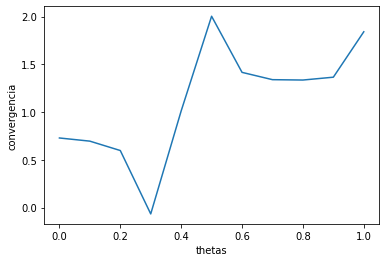

In [8]:
print("Taxas de Convergência")
convergencia = np.zeros(11)
thetas = np.linspace(0,1,11)

print("Método de Euler Implícito: ", (np.log10(erro_EI[k-1])-np.log10(erro_EI[0]))/(np.log10(refin[k-1])-np.log10(refin[0])))
convergencia[0] = (np.log10(erro_EI[k-1])-np.log10(erro_EI[0])) / (np.log10(refin[k-1])-np.log10(refin[0]))

print("Theta 0.1:  ", (np.log10(erro_1[k-1])-np.log10(erro_1[0])) / (np.log10(refin[k-1])-np.log10(refin[0])) )
convergencia[1] = (np.log10(erro_1[k-1])-np.log10(erro_1[0])) / (np.log10(refin[k-1])-np.log10(refin[0]))

print("Theta 0.2:  ", (np.log10(erro_2[k-1])-np.log10(erro_2[0])) / (np.log10(refin[k-1])-np.log10(refin[0])) )
convergencia[2] = (np.log10(erro_2[k-1])-np.log10(erro_2[0])) / (np.log10(refin[k-1])-np.log10(refin[0]))

print("Theta 0.3:  ", (np.log10(erro_3[k-1])-np.log10(erro_3[0])) / (np.log10(refin[k-1])-np.log10(refin[0])) )
convergencia[3] = (np.log10(erro_3[k-1])-np.log10(erro_3[0])) / (np.log10(refin[k-1])-np.log10(refin[0]))

print("Theta 0.4:  ", (np.log10(erro_4[k-1])-np.log10(erro_4[0])) / (np.log10(refin[k-1])-np.log10(refin[0])) )
convergencia[4] = (np.log10(erro_4[k-1])-np.log10(erro_4[0])) / (np.log10(refin[k-1])-np.log10(refin[0]))

print("Método de Crank-Nicolson:  ", (np.log10(erro_CK[k-1])-np.log10(erro_CK[0]))/(np.log10(refin[k-1])-np.log10(refin[0])))
convergencia[5] = (np.log10(erro_CK[k-1])-np.log10(erro_CK[0])) / (np.log10(refin[k-1])-np.log10(refin[0]))

print("Theta 0.6:  ", (np.log10(erro_6[k-1])-np.log10(erro_6[0])) / (np.log10(refin[k-1])-np.log10(refin[0])) )
convergencia[6] = (np.log10(erro_6[k-1])-np.log10(erro_6[0])) / (np.log10(refin[k-1])-np.log10(refin[0]))

print("Theta 0.7:  ", (np.log10(erro_7[k-1])-np.log10(erro_7[0])) / (np.log10(refin[k-1])-np.log10(refin[0])) )
convergencia[7] = (np.log10(erro_7[k-1])-np.log10(erro_7[0])) / (np.log10(refin[k-1])-np.log10(refin[0]))

print("Theta 0.8:  ", (np.log10(erro_8[k-1])-np.log10(erro_8[0])) / (np.log10(refin[k-1])-np.log10(refin[0])) )
convergencia[8] = (np.log10(erro_8[k-1])-np.log10(erro_8[0])) / (np.log10(refin[k-1])-np.log10(refin[0]))

print("Theta 0.9:  ", (np.log10(erro_9[k-1])-np.log10(erro_9[0])) / (np.log10(refin[k-1])-np.log10(refin[0])) )
convergencia[9] = (np.log10(erro_9[k-1])-np.log10(erro_9[0])) / (np.log10(refin[k-1])-np.log10(refin[0]))

print("Método de Euler Explícito: ", (np.log10(erro_EE[k-1])-np.log10(erro_EE[0]))/(np.log10(refin[k-1])-np.log10(refin[0])))
convergencia[10] = (np.log10(erro_EE[k-1])-np.log10(erro_EE[0])) / (np.log10(refin[k-1])-np.log10(refin[0]))

plt.plot(thetas, convergencia)
plt.xlabel('thetas')
plt.ylabel('convergencia')
plt.show()


#Questão 2


Problema de Segunda Ordem
 \begin{eqnarray}
 \dfrac{d^{2} u}{d t^{2}}=-sin(u),  \ \ \ \ u(0)=a, \ \ \ \ \dfrac{d u}{d t}(0)=b.
\end{eqnarray}


In [9]:
import numpy as np
import matplotlib.pyplot as plt

Solução Exata
$$
u(t)= \alpha\cos(t)+\beta\sin(t)
$$

In [10]:
def Exata2(a,b,t):
  return a*np.cos(t) + b*np.sin(t)

aproximação de segunda ordem para a derivada no tempo 
 $$\dfrac{d^2 u}{d t^2}\approx\dfrac{u^{n+1}-2u^n+u^{n-1}}{\Delta t^2} = - \sin(u^n)$$.

In [11]:
def discretizado(nel,a,b,dt):
  u = np.zeros(nel+1)
  u[0] = a
  u[1] = a + dt*b
  for n in range(1,nel):
    u[n+1] = -dt*dt*np.sin(u[n]) +2*u[n] - u[n-1]

  return u

In [12]:
def crankNicolsonDuplo(nel,a,b,dt):
  u = np.zeros(nel+1)
  u[0] = a
  v = np.zeros(nel+1)
  v[0] = b
  for n in range(0,nel):

    v[n+1] = - dt*np.sin(u[n]) + v[n]

    u[n+1] = dt*(v[n+1] + v[n])/2 + u[n]

  
  return u


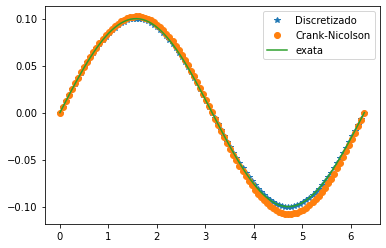

In [13]:
ti = 0
tf = 2*np.pi
a = 0
b = 0.1
nel = 100
dt = (tf-ti)/nel

t = np.linspace(ti,tf,nel+1)
tt = np.linspace(ti,tf,100)

plt.plot(t, discretizado(nel,a,b,dt), '*') 
plt.plot(t, crankNicolsonDuplo(nel,a,b,dt), 'o') 
plt.plot(tt,Exata2(a,b,tt))
plt.legend(["Discretizado","Crank-Nicolson","exata"])
plt.show()  

Erro na norma do máximo (norma do infinito)
$$
\|u(t_n)-u^n\|_{\infty} = \max_{0\leq n \leq N}{|u(t_n)-u^n|}
$$

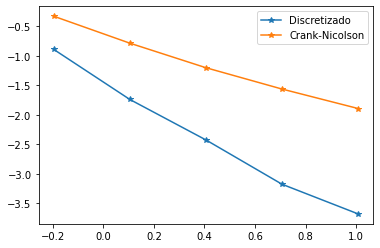

In [14]:
k = 5
erro_Discretizado = np.zeros(k)
erro_CK = np.zeros(k)

refin = np.zeros(k)

for i in range(0,k):
  nel = 2**(i+2)
  dt = (tf-ti)/nel
  t = np.linspace(ti,tf,nel+1)
  erro_Discretizado[i] = np.max(np.abs(discretizado(nel,a,b,dt) - Exata2(a,b,t)))
  erro_CK[i] = np.max(np.abs(crankNicolsonDuplo(nel,a,b,dt) - Exata2(a,b,t)))
  refin[i] = dt

plt.plot(-np.log10(refin),np.log10(erro_Discretizado),'-*')
plt.plot(-np.log10(refin),np.log10(erro_CK),'-*')

plt.legend(["Discretizado", "Crank-Nicolson"])
plt.show()


In [15]:
print("Discretizado:  ", (np.log10(erro_Discretizado[k-1])-np.log10(erro_Discretizado[0]))/(np.log10(refin[k-1])-np.log10(refin[0])))
print("Método de Crank-Nicolson:  ", (np.log10(erro_CK[k-1])-np.log10(erro_CK[0]))/(np.log10(refin[k-1])-np.log10(refin[0])))

Discretizado:   2.3149839457759427
Método de Crank-Nicolson:   1.298884808024642
